In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("CC2020_train_final.csv")

In [3]:
df.head()

,YEAR,LOCATION,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER,YIELD,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,18,Loc 5608,Inbred_142,Cluster11,Tester_740,Cluster10,1.135462,NaN,NaN,NaN
1,18,Loc 4533,Inbred_142,Cluster11,Tester_740,Cluster10,1.139813,NaN,NaN,NaN
2,18,Loc 5620,Inbred_142,Cluster11,Tester_740,Cluster10,1.117778,NaN,NaN,NaN
3,18,Loc 4732,Inbred_142,Cluster11,Tester_740,Cluster10,1.171366,NaN,NaN,NaN
4,18,Loc 5500,Inbred_142,Cluster11,Tester_740,Cluster10,1.059364,NaN,NaN,NaN


In [4]:
df.shape

(199476, 10)

In [5]:
grp_df = pd.read_csv("grouped_data.csv")
grp_df.drop(labels=grp_df.columns[0], axis=1, inplace=True)
grp_df.head()

,INBRED,TESTER,mean
0,Inbred_1071,Tester_1345,0.986544
1,Inbred_1071,Tester_4373,1.057704
2,Inbred_1071,Tester_4473,1.023704
3,Inbred_1071,Tester_4541,1.014735
4,Inbred_1071,Tester_5305,1.062727


In [6]:
mat = grp_df.pivot(index='INBRED', columns='TESTER', values='mean').values

In [7]:
data_ro = grp_df.pivot(index='INBRED', columns='TESTER', values='mean')

In [8]:
type(mat)

numpy.ndarray

In [9]:
nonzero = []
for i in range(mat.shape[1]):
    nonzero.append(sum(~np.isnan(mat[:,i]))) 

In [10]:
import matplotlib.pyplot as plt

(array([290., 117.,  40.,  23.,  11.,   4.,   3.,   3.,   2.,   3.]),
 array([  1. ,  16.6,  32.2,  47.8,  63.4,  79. ,  94.6, 110.2, 125.8,
        141.4, 157. ]),
 <a list of 10 Patch objects>)

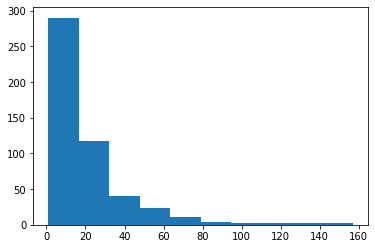

In [11]:
plt.hist(nonzero)

In [12]:
dict_ = {k: (~data_ro[k].isnull()).sum() for k in data_ro.columns}
sorted_d = sorted(dict_.items(), key=lambda x: x[1])

In [13]:
test_df = data_ro.copy()
test_df = test_df * 0

In [14]:
test_df.head()

TESTER,Tester_1345,Tester_1349,Tester_1397,Tester_2636,Tester_2652,Tester_2683,Tester_2689,Tester_2690,Tester_2721,Tester_2724,...,Tester_821,Tester_8218,Tester_8246,Tester_8248,Tester_8249,Tester_8250,Tester_8253,Tester_8254,Tester_828,Tester_829
INBRED,,,,,,,,,,,,,,,,,,,,,
Inbred_1071,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inbred_122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inbred_1337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inbred_1339,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inbred_1340,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# creating test data
min_sel = 1
picked = set()
for col , num in sorted_d:
    if num > min_sel:
        full_col = data_ro[col]
        indices = data_ro[~full_col.isnull()].index
#         print(indices)
        indices = [ind for ind in indices if ind not in picked]
        if len(indices) > 0:
            pick = np.random.choice(indices, size = max(1, len(indices)//10))
            for i in indices:
                picked.add(i)
            for p in pick:
                test_df.loc[p, col] = data_ro.loc[p, col]
                data_ro.loc[p, col] = np.nan
    

In [16]:
len(picked)

593

In [17]:
test_df.head()

TESTER,Tester_1345,Tester_1349,Tester_1397,Tester_2636,Tester_2652,Tester_2683,Tester_2689,Tester_2690,Tester_2721,Tester_2724,...,Tester_821,Tester_8218,Tester_8246,Tester_8248,Tester_8249,Tester_8250,Tester_8253,Tester_8254,Tester_828,Tester_829
INBRED,,,,,,,,,,,,,,,,,,,,,
Inbred_1071,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inbred_122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inbred_1337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.904168,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inbred_1339,1.0025,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inbred_1340,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data_ro.head()

TESTER,Tester_1345,Tester_1349,Tester_1397,Tester_2636,Tester_2652,Tester_2683,Tester_2689,Tester_2690,Tester_2721,Tester_2724,...,Tester_821,Tester_8218,Tester_8246,Tester_8248,Tester_8249,Tester_8250,Tester_8253,Tester_8254,Tester_828,Tester_829
INBRED,,,,,,,,,,,,,,,,,,,,,
Inbred_1071,0.986544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inbred_122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.084595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inbred_1337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inbred_1339,NaN,NaN,NaN,NaN,0.853845,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inbred_1340,NaN,1.013467,NaN,NaN,NaN,NaN,1.004264,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# !pip install matrix-completion

In [20]:
mask = data_ro.values
mat = data_ro.values

In [21]:
#mask = np.isnan(mat)

In [22]:
for i in range(len(mask)):
    for j in range(len(mask[0])):
        if np.isnan(mask[i,j]): 
            mask[i,j] = 0
        else:
            mask[i,j] = 1

In [23]:
mask

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
data_ro

TESTER,Tester_1345,Tester_1349,Tester_1397,Tester_2636,Tester_2652,Tester_2683,Tester_2689,Tester_2690,Tester_2721,Tester_2724,...,Tester_821,Tester_8218,Tester_8246,Tester_8248,Tester_8249,Tester_8250,Tester_8253,Tester_8254,Tester_828,Tester_829
INBRED,,,,,,,,,,,,,,,,,,,,,
Inbred_1071,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inbred_122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inbred_1337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inbred_1339,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inbred_1340,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inbred_1341,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inbred_1342,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inbred_1344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inbred_1345,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from matrix_completion import svt_solve, calc_unobserved_rmse

U = np.random.randn(mat.shape[0], 2)
V = np.random.randn(mat.shape[1], 2)
R = mat + np.dot(U, V.T)

# mask = np.round(np.random.rand(20, 15))
R_hat = svt_solve(R, mask)

LinAlgError: SVD did not converge